# **Study Case : Perusahaan Ingin memperoleh pemahaman yang lebih mendalam tentang faktor-faktor yang dapat mempengaruhi kenaikan harga properti.**

#Import Data dari Google Drive dan Import Libraries yang akan digunakan pada project kali ini.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")

# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Datasets/House_prices/train.csv")

##Menganilis Garis Besar Informasi dari Dataset

In [ ]:
df.shape

(1460, 81)

In [ ]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

Mengelompokan Data menjadi Categorical dan Numerical untuk Mempermudah Analisis pada Data.

In [ ]:
df_cat = df.loc[:,df.dtypes == 'object']
df_num = df.loc[:,df.dtypes != 'object']

In [ ]:
df_num.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [ ]:
df_cat.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#LOOK FOR DUPLICATED DATA

Dataset kali ini tidak memiliki Duplikasi Data.

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

#LOOK FOR MISSING VALUE

Saya mencari Missing Value dari Data Categorical dan Numerical karena nantinya penanganannya akan berbeda

In [ ]:
null_values =  df_cat.isna().sum()
null_values_num =  df_num.isna().sum()

null_values = null_values[null_values > 0]
null_values.sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
Electrical         1
dtype: int64

In [ ]:
null_values_num = null_values_num[null_values_num > 0]
null_values_num.sort_values(ascending = False)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

Melihat Nilai Unique dari setiap Kolom Categorical yang memiliki Missing Value dan membandingkannya dengan Informasi setiap Kolom dari Informasi Dataset yang ada pada Kaggle agar memahami mengapa Kolom tersebut memiliki Missing Value.

In [ ]:
for col in null_values.index:
    if df[col].dtype == "object":
        print("Attribute name: ", col)
        print("======================")
        print(df[col].value_counts())
        print("======================")

Attribute name:  Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64
Attribute name:  MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
Attribute name:  BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
Attribute name:  BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Attribute name:  BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Attribute name:  BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Attribute name:  BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Attribute name:  Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Attribute name:  FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
Attribute

##HANDLE MISSING VALUE CATEGORICAL DATA

Saya membuang data dari kolom 'Electrical' karena saya bisa mengatakan bahwa itu adalah anomali data dikarenakan tidak ada rumah pada dataset kali ini yang tidak memiliki Listrik dan Karena hanya satu buah baris saja yang memiliki Missing Value jadi tidak akan berpengaruh banyak.

In [ ]:
df.dropna(subset=['Electrical'], inplace=True)

Setelah Membaca dan Memahami Isi nilai Unique pada Setiap Kolom Categorical, Saya dapat mengatakan banyaknya missing value yang ada dikarenakan memang Rumah tersebut tidak memiliki Fitur yang ada.

Maka saya akan melakukan Imputasi Missing Value dengan 'NA' yang berarti Rumah tersebut memang tidak memiliki Fitur yang ada.

In [ ]:
for col in df_cat:
  df[col] = df[col].fillna('NA')

##HANDLE MISSING VALUE NUMERICAL DATA

Saya mencoba untuk melihat Informasi Statistik dari Kolom yang mempunyai Missing Value pada Numerical Data.

In [ ]:
num_missing = df[['LotFrontage','GarageYrBlt','MasVnrArea']]
num_missing.describe()

LotFrontage  GarageYrBlt  MasVnrArea
count  1200.000000  1378.000000  1451.00000
mean     70.047500  1978.485486   103.75672
std      24.294727    24.686740   181.10815
min      21.000000  1900.000000     0.00000
25%      59.000000  1961.000000     0.00000
50%      69.000000  1980.000000     0.00000
75%      80.000000  2002.000000   166.00000
max     313.000000  2010.000000  1600.00000

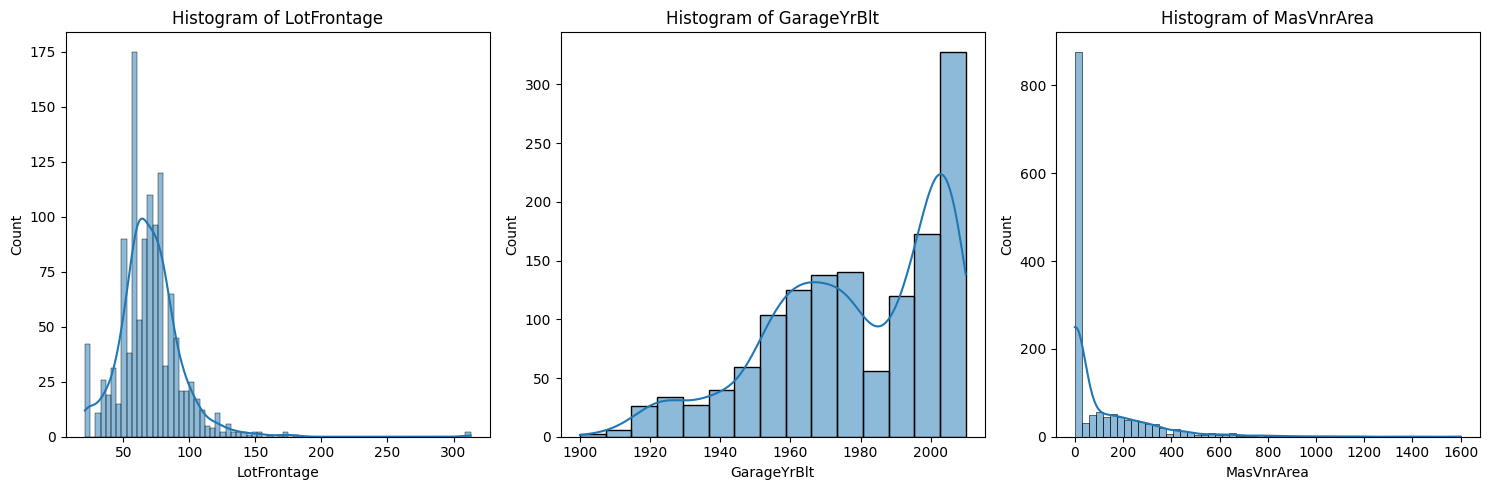

In [ ]:
columns_to_visualize = num_missing.columns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, column in enumerate(columns_to_visualize):
    sns.histplot(data=num_missing, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

Setelah Melakukan Visualisasi Distribusi dari Data Numeric yang mempunyai Missing Value saya memutuskan Menggunakan Median Untuk men-Imputasi Missing Value untuk Kolom ['LotFrontage', 'MasVnrArea'] karena Distribusi Berbentuk Skew.

Untuk Kolom ['GarageYrBlt'] saya men-Imputasi Missing Value menggunakan metode 'bfill' agar penyebaran tahun nya merata.

In [ ]:
cols_to_fill = ['LotFrontage', 'MasVnrArea']
df[cols_to_fill] = df[cols_to_fill].fillna(df[cols_to_fill].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(method ='bfill')

#OUTLIERS

Saya Memisahkan Data Numerical menjadi data Continuous dan Discrete agar nanti saya dapat melihat Visualisasi Data setelah dilakukan Drop Outlier.

Saya juga membuat Data Baru karena nantinya saya masih ingin Melakukan EDA dengan data yang masih mempunyai Outlier agar mendapatkan Informasi yang lebih Real dan Bervariatif.

cleaned_df dapat dipakai saat saya menyiapkan data untuk proses Modelling nantinya.

In [ ]:
continuous_numerical_features = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                                 'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt',
                                 'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
                                 'MiscVal','YrSold']

discrete_numerical_features = [ 'OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath',
 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold', "MSSubClass"]

Mencari dan Menghapus Outlier menggunakan Standar Deviasi, jika standar deviasi lebih dari 3 dari rata-rata maka akan dikategorikan sebagai Outlier.

In [ ]:
cleaned_df = df.copy()

def find_outliers(data, threshold=3):
    mean = np.mean(data)
    std_dev = np.std(data)
    return abs(data - mean) <= threshold * std_dev

for feature in continuous_numerical_features:
    outliers = find_outliers(df[feature])
    cleaned_df = cleaned_df[outliers]

In [ ]:
cleaned_df.shape

(1164, 81)

In [ ]:
df.shape

(1459, 81)

##Before Remove Outlier

In [ ]:
# df[df['SalePrice'] > 500000].sort_values(by = 'SalePrice',ascending=False)
df[df['SalePrice'] > 500000].shape[0]

9

**Boxplot Target Feature Before Removing Outliers**

<Axes: xlabel='SalePrice'>

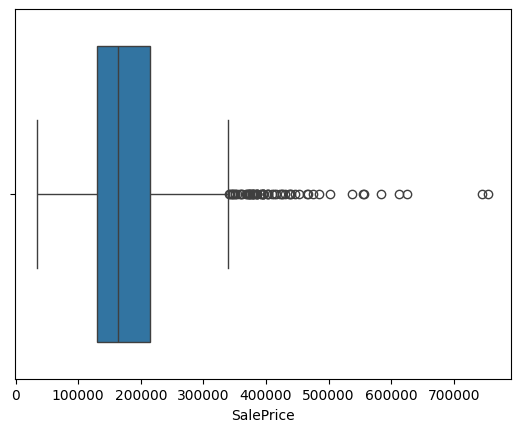

In [ ]:
sns.boxplot(x=df["SalePrice"])

**Continuous Data Before Removing Outliers**

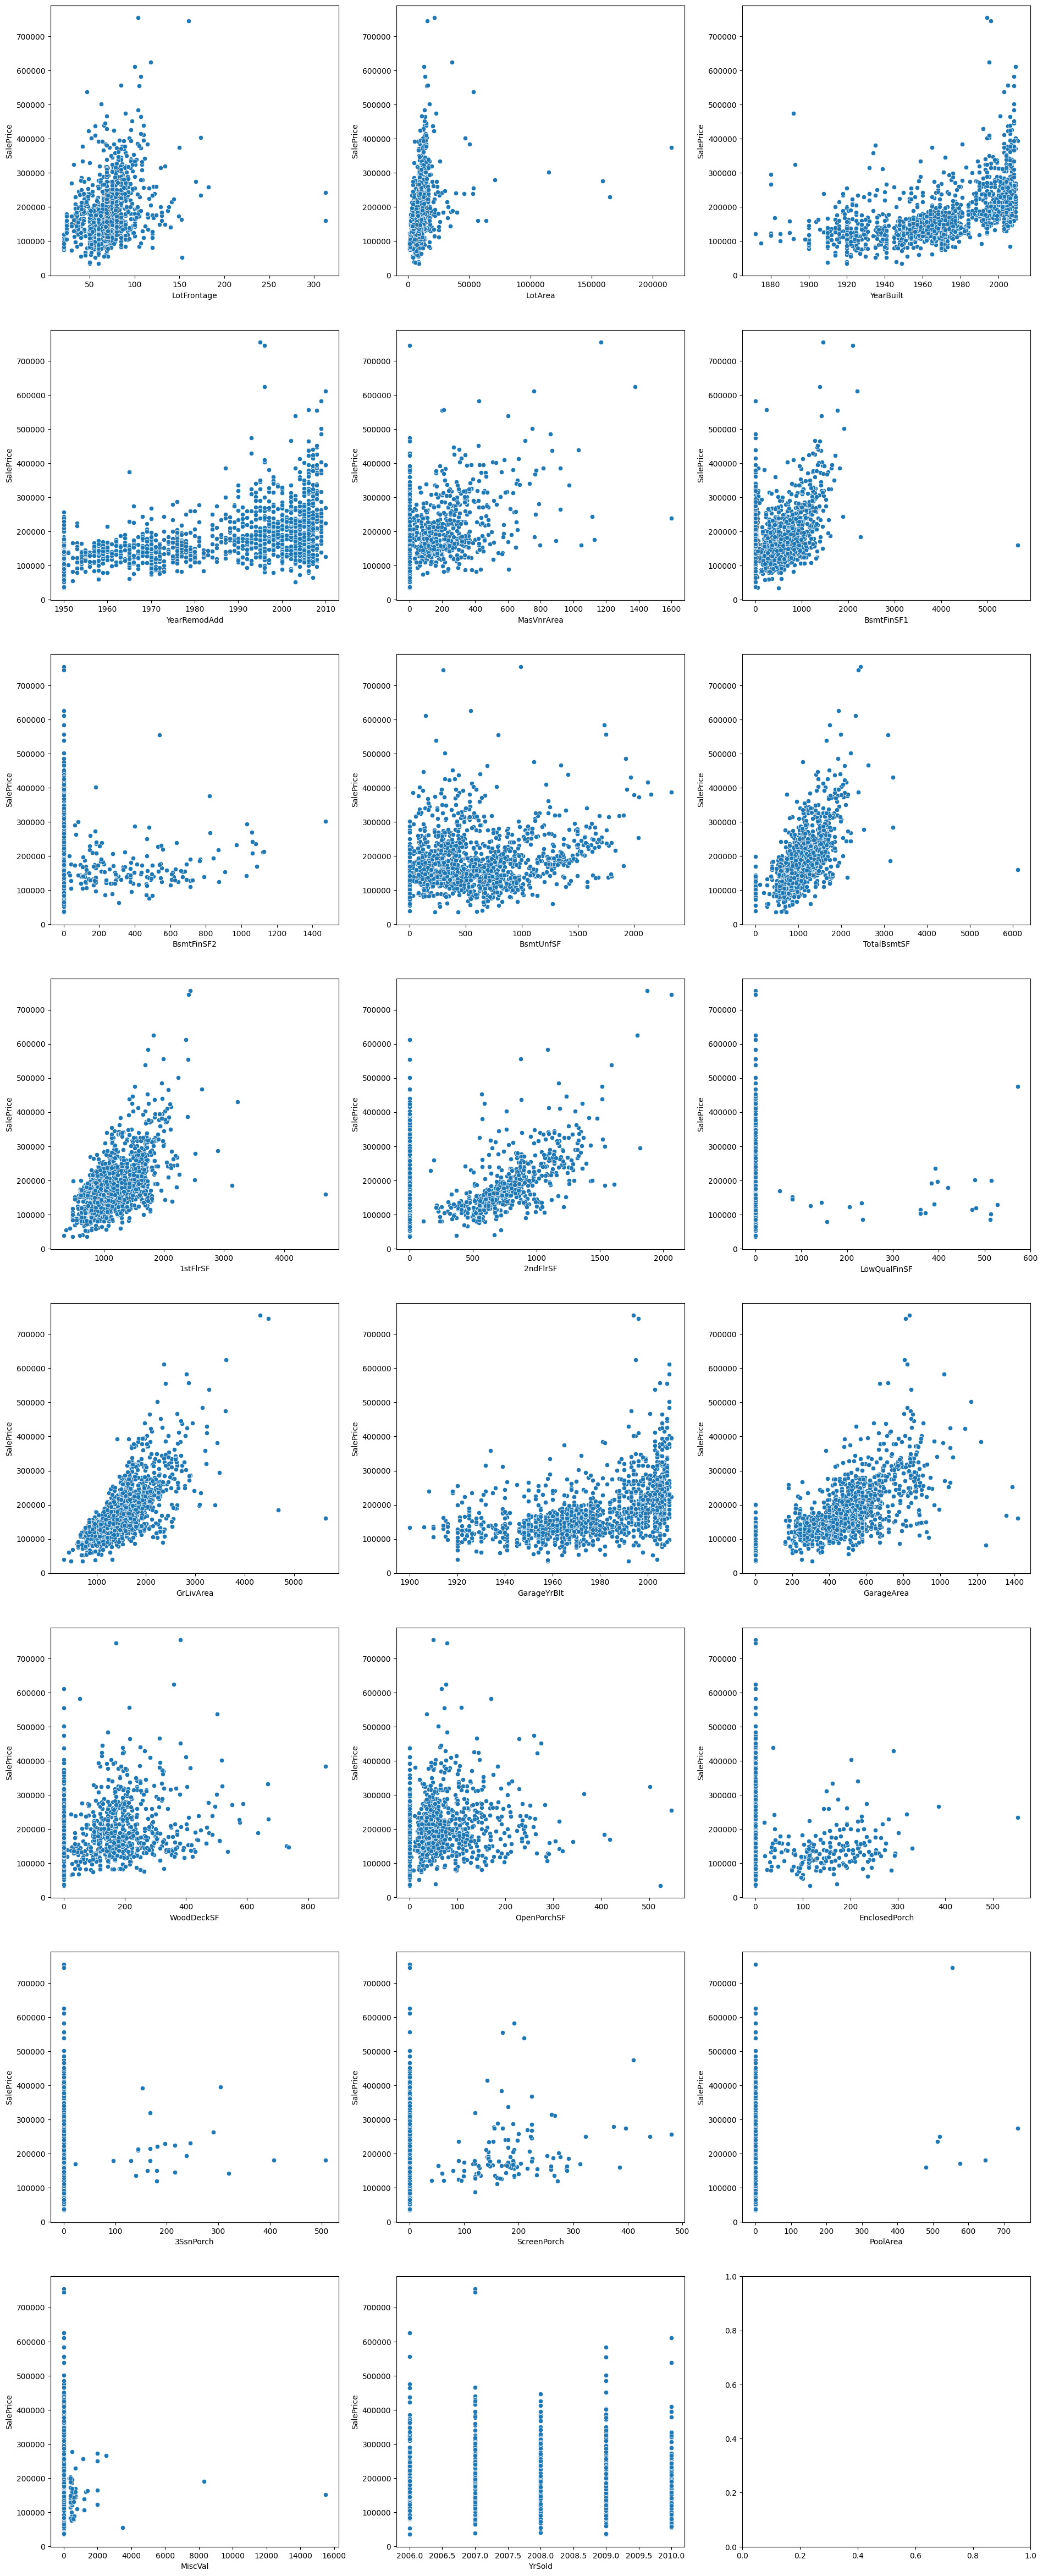

In [ ]:
fig, ax = plt.subplots(8, 3, figsize=(23, 60))
for var, subplot in zip(continuous_numerical_features, ax.flatten()):
    sns.scatterplot(x=var, y='SalePrice',  data=df, ax=subplot)

##After Remove Outlier

**Continuous Data**

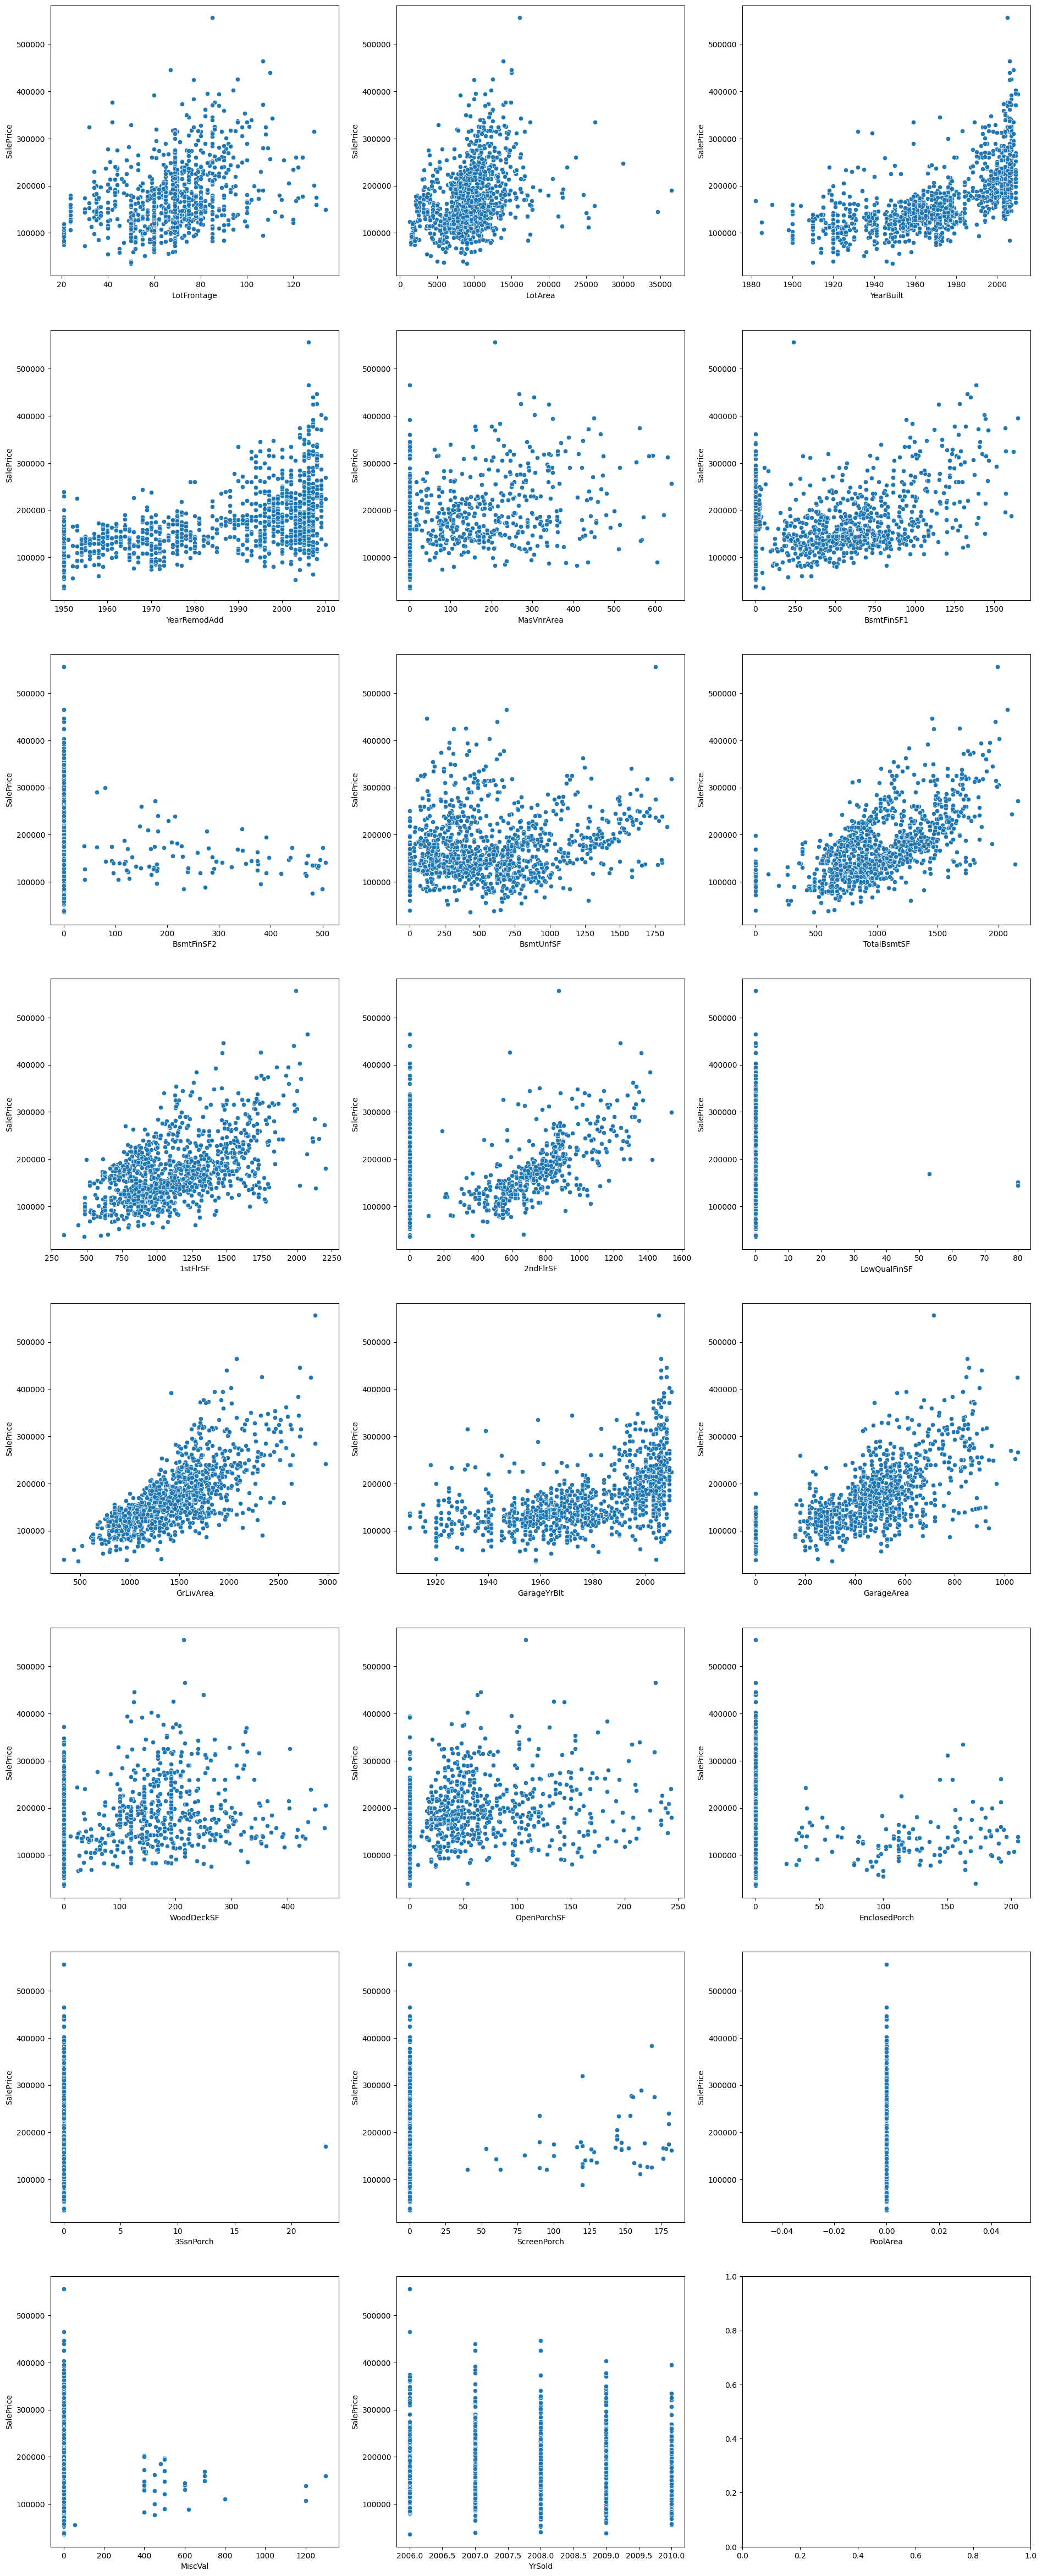

In [ ]:
fig, ax = plt.subplots(8, 3, figsize=(23, 60))
for var, subplot in zip(continuous_numerical_features, ax.flatten()):
    sns.scatterplot(x=var, y='SalePrice', data=cleaned_df, ax=subplot)

**Discrite Data**

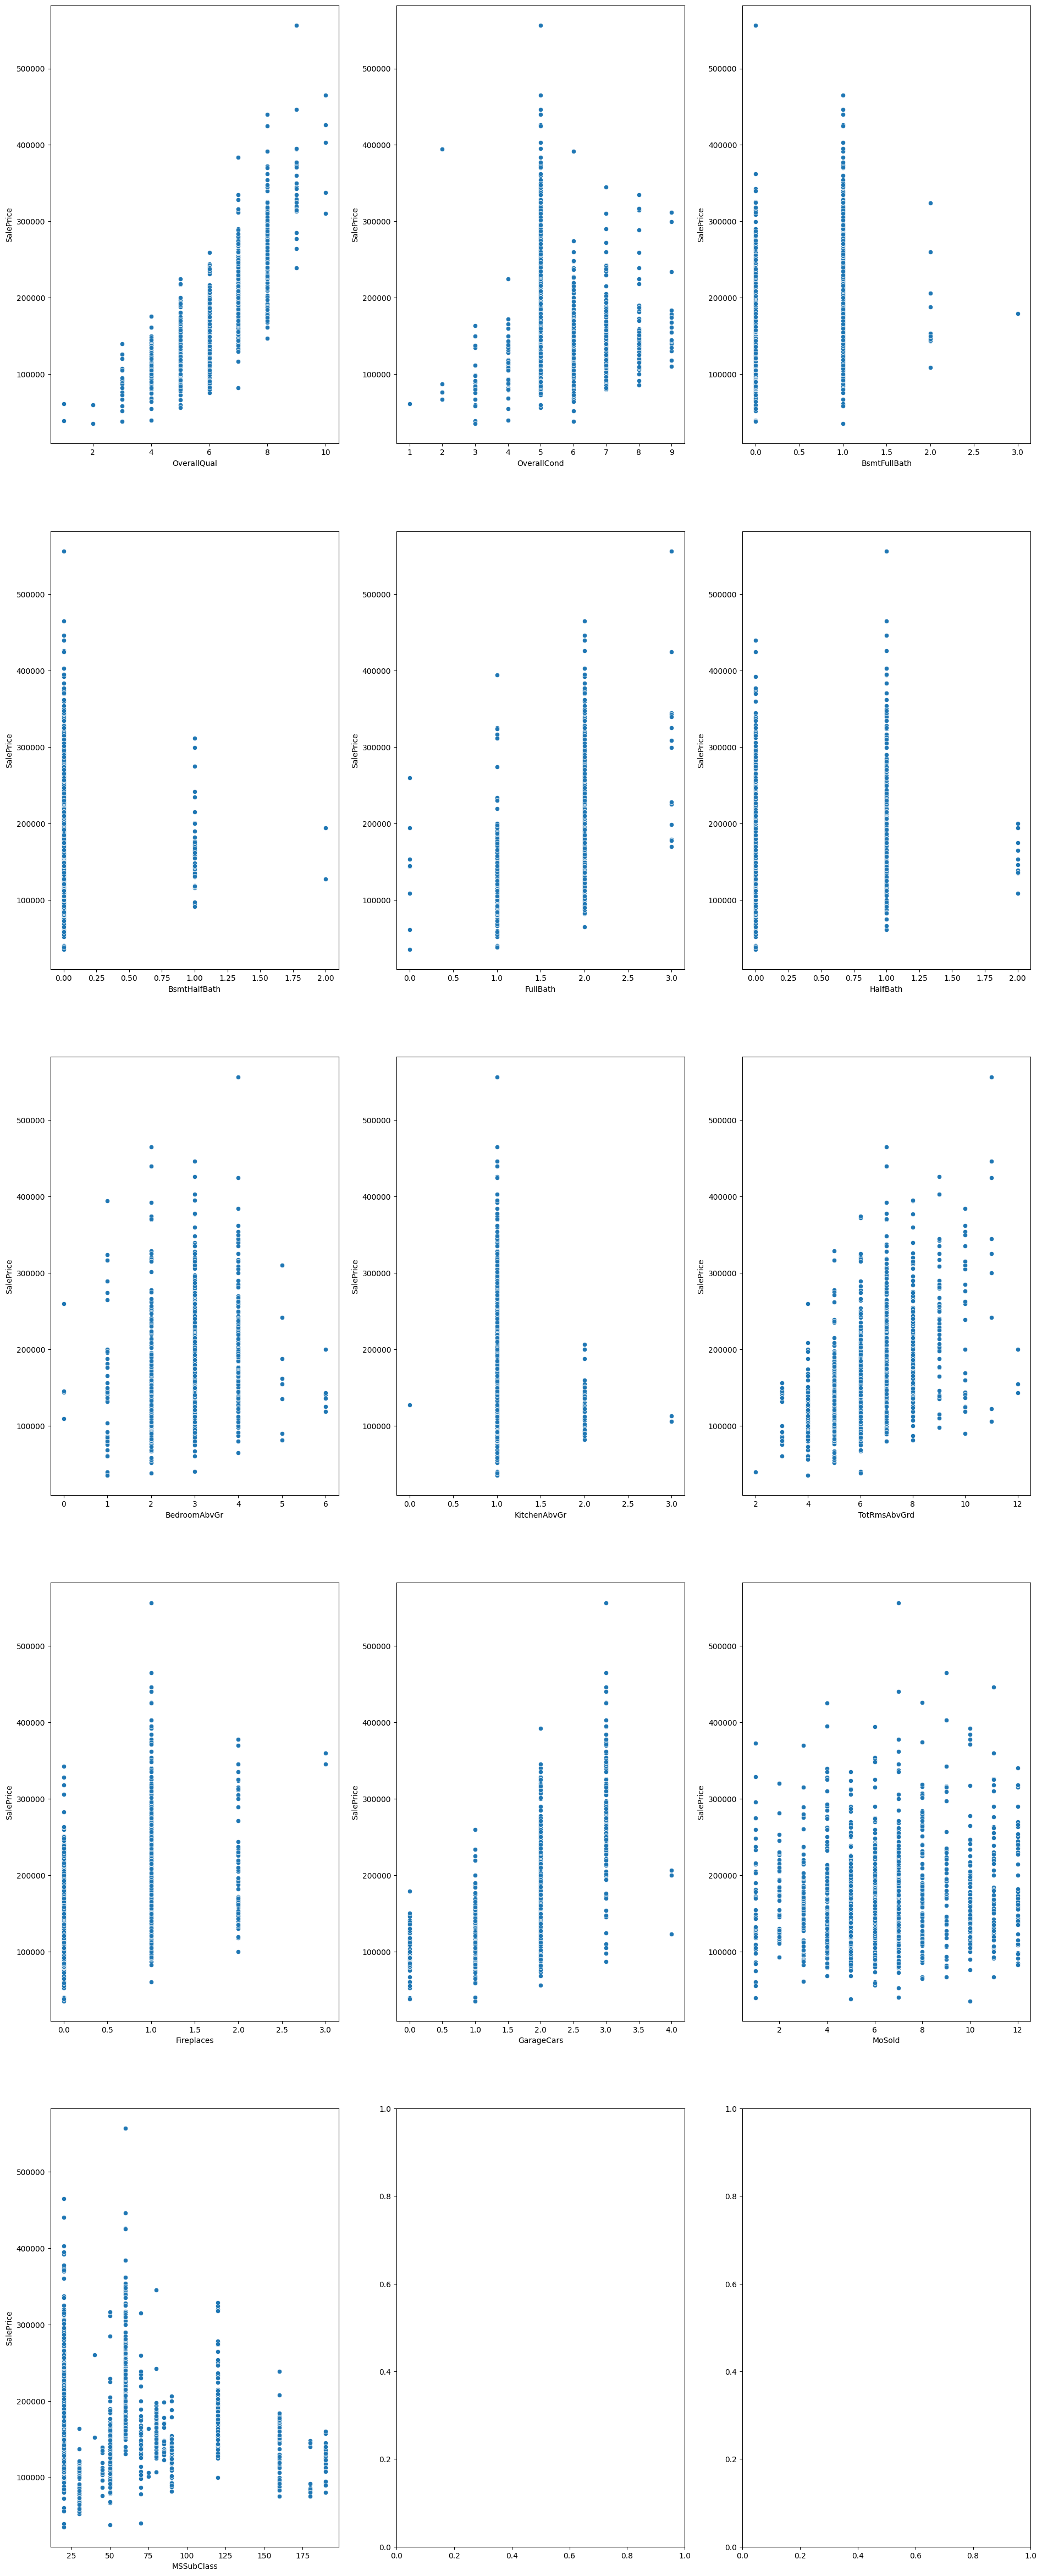

In [ ]:
fig, ax = plt.subplots(5, 3, figsize=(23, 60))
for var, subplot in zip(discrete_numerical_features, ax.flatten()):
    sns.scatterplot(x=var, y='SalePrice',  data=cleaned_df, ax=subplot)

#**Tidak Dilakukan Handling Imbalance Dataset karena Target data tidak terjadi Imbalance

#EXPLORE DATA

##**Mengelaborasi features dan tipe data (nominal, ordinal, numerical)**

###Categorical Data

Saya membagi Data Categorical Menjadi 2 Tipe yaitu, Nominal dan Ordinal.



*   Nominal Adalah data kualitatif yang dikategorikan berdasarkan ciri-ciri deskriptif saja, Jenis data ini tidak memiliki urutan peringkat atau hierarki.
*   Ordinal Adalah data kualitatif yang dikategorikan dalam urutan atau hierarki peringkat tertentu



In [ ]:
df_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
ordinal_cat = ['SaleCondition', 'PoolQc', 'GarageCond', 'GarageQual', 'GarageFinish', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 'BsmtQual','BsmtCond', 'ExterCond', 'ExterQual']
nominal_cat = [col for col in df_cat.columns if col not in ordinal_cat]

print("Ordinal Data: ",ordinal_cat)
print("Nominal Data: ",nominal_cat)
print("Jumlah Ordinal Data: ",len(ordinal_cat))
print("Jumlah Nominal Data: ",len(nominal_cat))

Ordinal Data:  ['SaleCondition', 'PoolQc', 'GarageCond', 'GarageQual', 'GarageFinish', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 'BsmtQual', 'BsmtCond', 'ExterCond', 'ExterQual']
Nominal Data:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']
Jumlah Ordinal Data:  12
Jumlah Nominal Data:  32


###Numerical Data

Saya membagi Data Numerical Menjadi 2 Tipe yaitu, Discrete dan Continuous.



*   Diskrit adalah variabel yang mempunyai nilai berbeda dan dapat dihitung.
*   Continuous adalah variabel yang mempunyai nilai apa pun dalam rentang tertentu, dan jumlah kemungkinan nilai dalam rentang tersebut tidak terbatas.



In [ ]:
df_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
print("Continuous Data: ",continuous_numerical_features)
print("Discrete Data: ",discrete_numerical_features )
print("Jumlah Continuous Data: ",len(continuous_numerical_features))
print("Jumlah Discrete Data: ",len(discrete_numerical_features))

Continuous Data:  ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']
Discrete Data:  ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'MSSubClass']
Jumlah Continuous Data:  23
Jumlah Discrete Data:  13


##**Menjelaskan perbedaan penggunaan mean, median, modus dan mendeskripsikan statistical five summaries**

**Mean** adalah nilai rata-rata dari seluruh data dalam kumpulan tersebut.
- Digunakan ketika data memiliki distribusi normal atau mendekati normal.
- Rentan terhadap outlier atau nilai ekstrem yang dapat "menarik" rerata ke arah mereka.
- Dihitung dengan menjumlahkan semua nilai dalam data dan kemudian membaginya dengan jumlah total nilai.

**Median** adalah nilai tengah dalam distribusi data ketika data diurutkan dari nilai terendah hingga tertinggi.
- Digunakan ketika data memiliki outlier yang signifikan atau ketika distribusi tidak normal.
- Tidak dipengaruhi oleh nilai ekstrem, sehingga lebih stabil daripada mean.
- Cocok untuk data yang tidak simetris atau memiliki skewness.
- Untuk menemukan median, data harus diurutkan terlebih dahulu, dan nilai tengah diambil sebagai median.

**Modus** adalah nilai yang paling sering muncul dalam distribusi data.
- Cocok untuk mengidentifikasi nilai yang paling umum atau dominan dalam kumpulan data.

In [ ]:
mean = df['SalePrice'].mean()
median = df['SalePrice'].median()
mode = df['SalePrice'].mode()

print(f"""
============================
Nilai Mean : {mean}
Nilai median : {median}
Nilai modus : {mode}
============================
""")


Nilai Mean : 180930.3947909527
Nilai median : 163000.0
Nilai modus : 0    140000
Name: SalePrice, dtype: int64



**Statistical Five Summaries**

1. Minimum (Min) - Nilai terkecil
2. Maksimum (Maks) - Nilai terbesar
3. Kuartil Pertama Q1
 - suku tengah dari nilai di bawah median
4. Kuartil Kedua Q2
 - Median
5. Kuartil Ketiga Q3
 - suku tengah dari nilai di atas median

Dari Statistical Five Summaries dibawah informasi yang didapat adalah:
- Bentuk Distribusi Data dari kolom SalePrice adalah **Positive Skew**, ini dapat dilihat dari nilai **Mean** yang lebih besar dari nilai **Median**.
- Terdapat **Outliers** dikarenakan nilai **Q3** dan nilai **Max** memiliki perbedaan yang terlampau jauh.
- Rentang Harga yang memiliki variasi cukup besar dapat dilihat dari nilai Min, Q2, Max.
- Kita juga dapat mencari Outlier menggunakan IQR (Q3-Q1) lalu mendefinisikan Batas Atas dan Bawahnya. nilai yang diluar dari batas atas atau bawah maka dapat diindikasikan sebagai Outlier.


In [ ]:
df['SalePrice'].describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

##**Mendeskripsikan distribusi data**

**Saya akan Mengambil contoh kolom 'YearBuilt' atau Tahun dibuat nya Rumah pada Dataset kali ini.**

Dapat dilihat pada gambar dibawah Distribusi memiliki Skewness Negative artinya data cenderung berkumpul pada akhir data dan Banyak Rumah yang dibuat pada tahun 1950 keatas.

Dari Visualisasi Boxplot dapat dilihat bahwa terdapat Outlier pada tahun 1900 kebawah dan Terlihat bahwa variasi data yang tidak terlalu besar.

<Axes: xlabel='YearBuilt', ylabel='Count'>

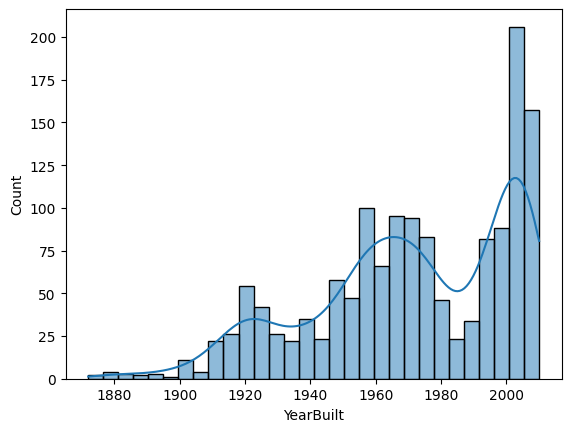

In [ ]:
sns.histplot(data = df, x = 'YearBuilt', bins=30, kde= True)

<Axes: xlabel='YearBuilt'>

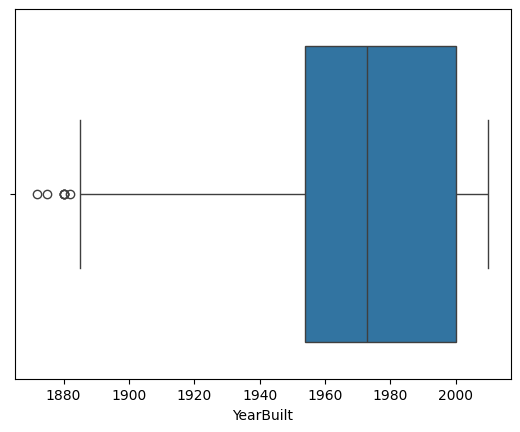

In [ ]:
sns.boxplot(data = df, x = 'YearBuilt')

##**Univariate Analysis Numerical Data**

Saya mencoba memahami satu persatu Fitur yang ada melalui Univariate Analysis ini dan akan mendalami nya lagi saat Multivariate Analysis untuk mencari Insight.

Mendefiniskan Fungsi Visualisasi Histogram semua kolom Numerical menggunakan seaborn

In [ ]:
def visualize_hist(numerical_column):
  # Calculate number of rows and columns for subplots
  n_cols = 6
  n_rows = -(-len(numerical_column) // n_cols)  # Ceiling division to ensure all items are covered

  # Set up the figure and axes with proper size and spacing
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows), sharex=False, sharey=False)

  # Loop through each categorical column and create Histogram
  for i, column in enumerate(numerical_column):
      sns.histplot(data=df, x=column,ax=axes[i//n_cols, i%n_cols])
      axes[i//n_cols, i%n_cols].set_title(column)
      axes[i//n_cols, i%n_cols].set_ylabel('')
      axes[i//n_cols, i%n_cols].set_xlabel('Count')
      axes[i//n_cols, i%n_cols].tick_params(axis='y', labelrotation=0)  # Rotate y-axis labels for better readability

  # Remove any unused subplots
  for j in range(len(numerical_column), n_rows * n_cols):
      fig.delaxes(axes.flatten()[j])

  # Adjust layout
  plt.tight_layout()
  plt.show()

Continuous Data

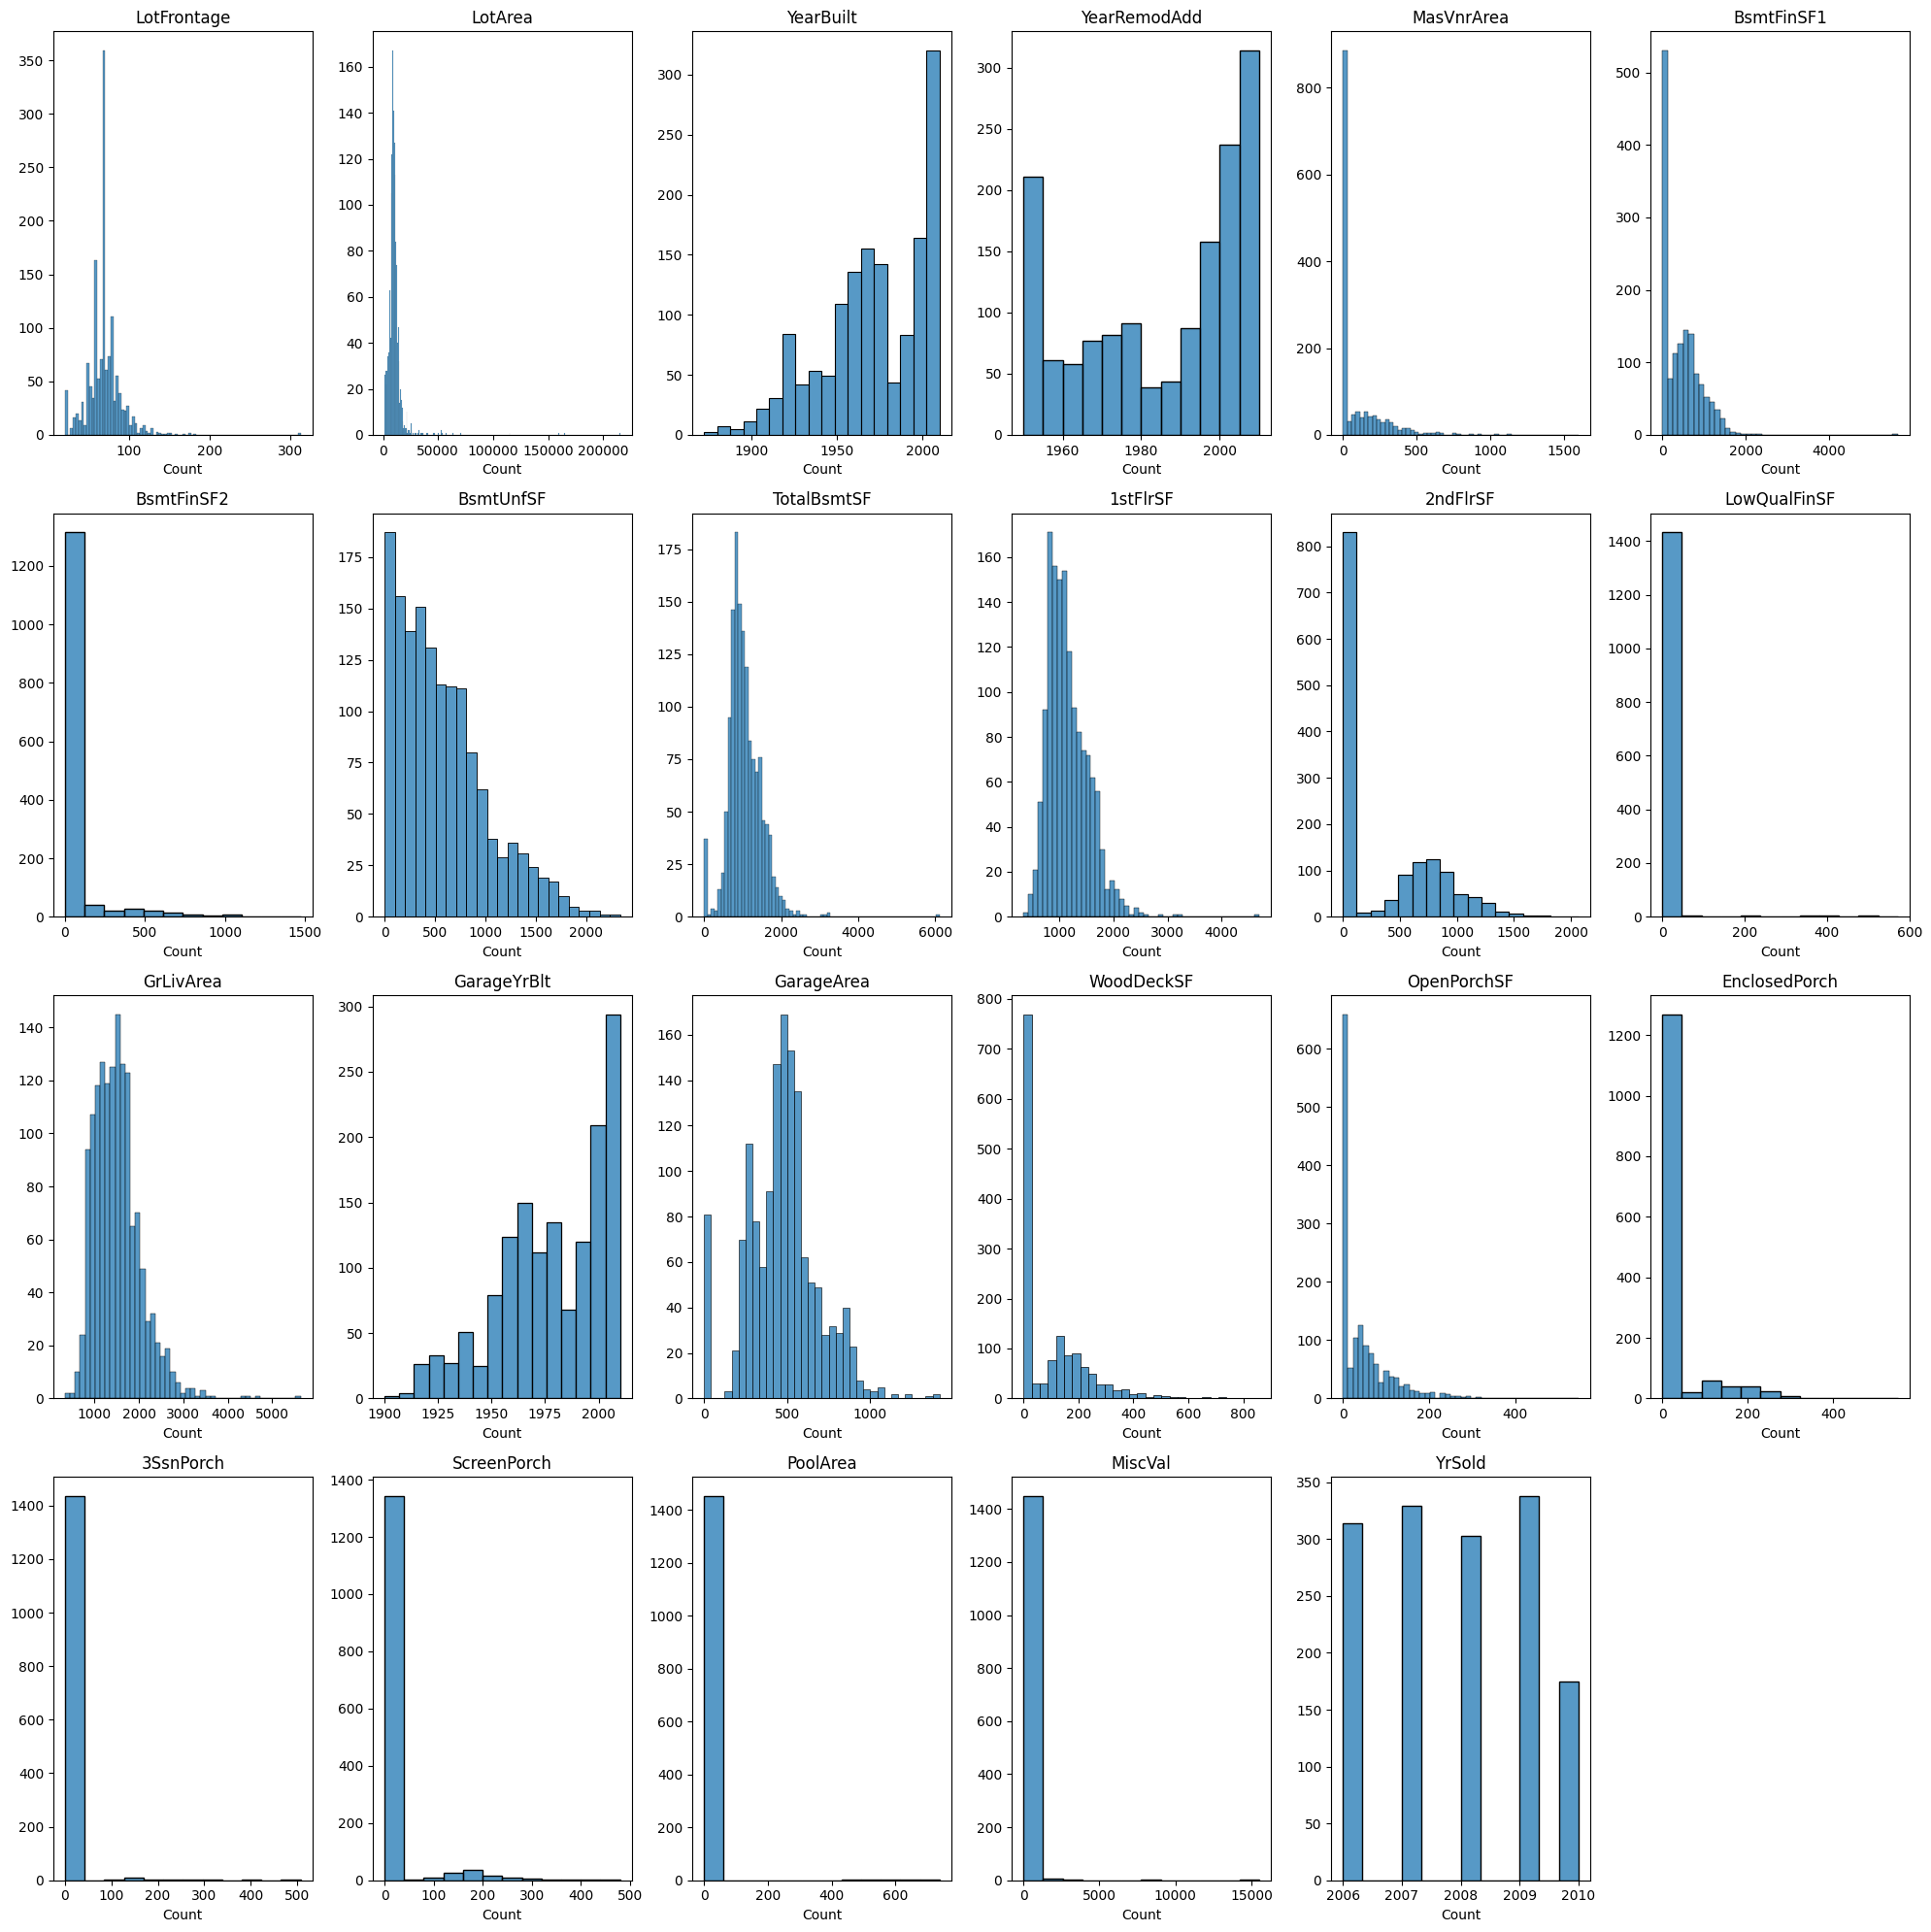

In [ ]:
visualize_hist(continuous_numerical_features)

Discrete Data

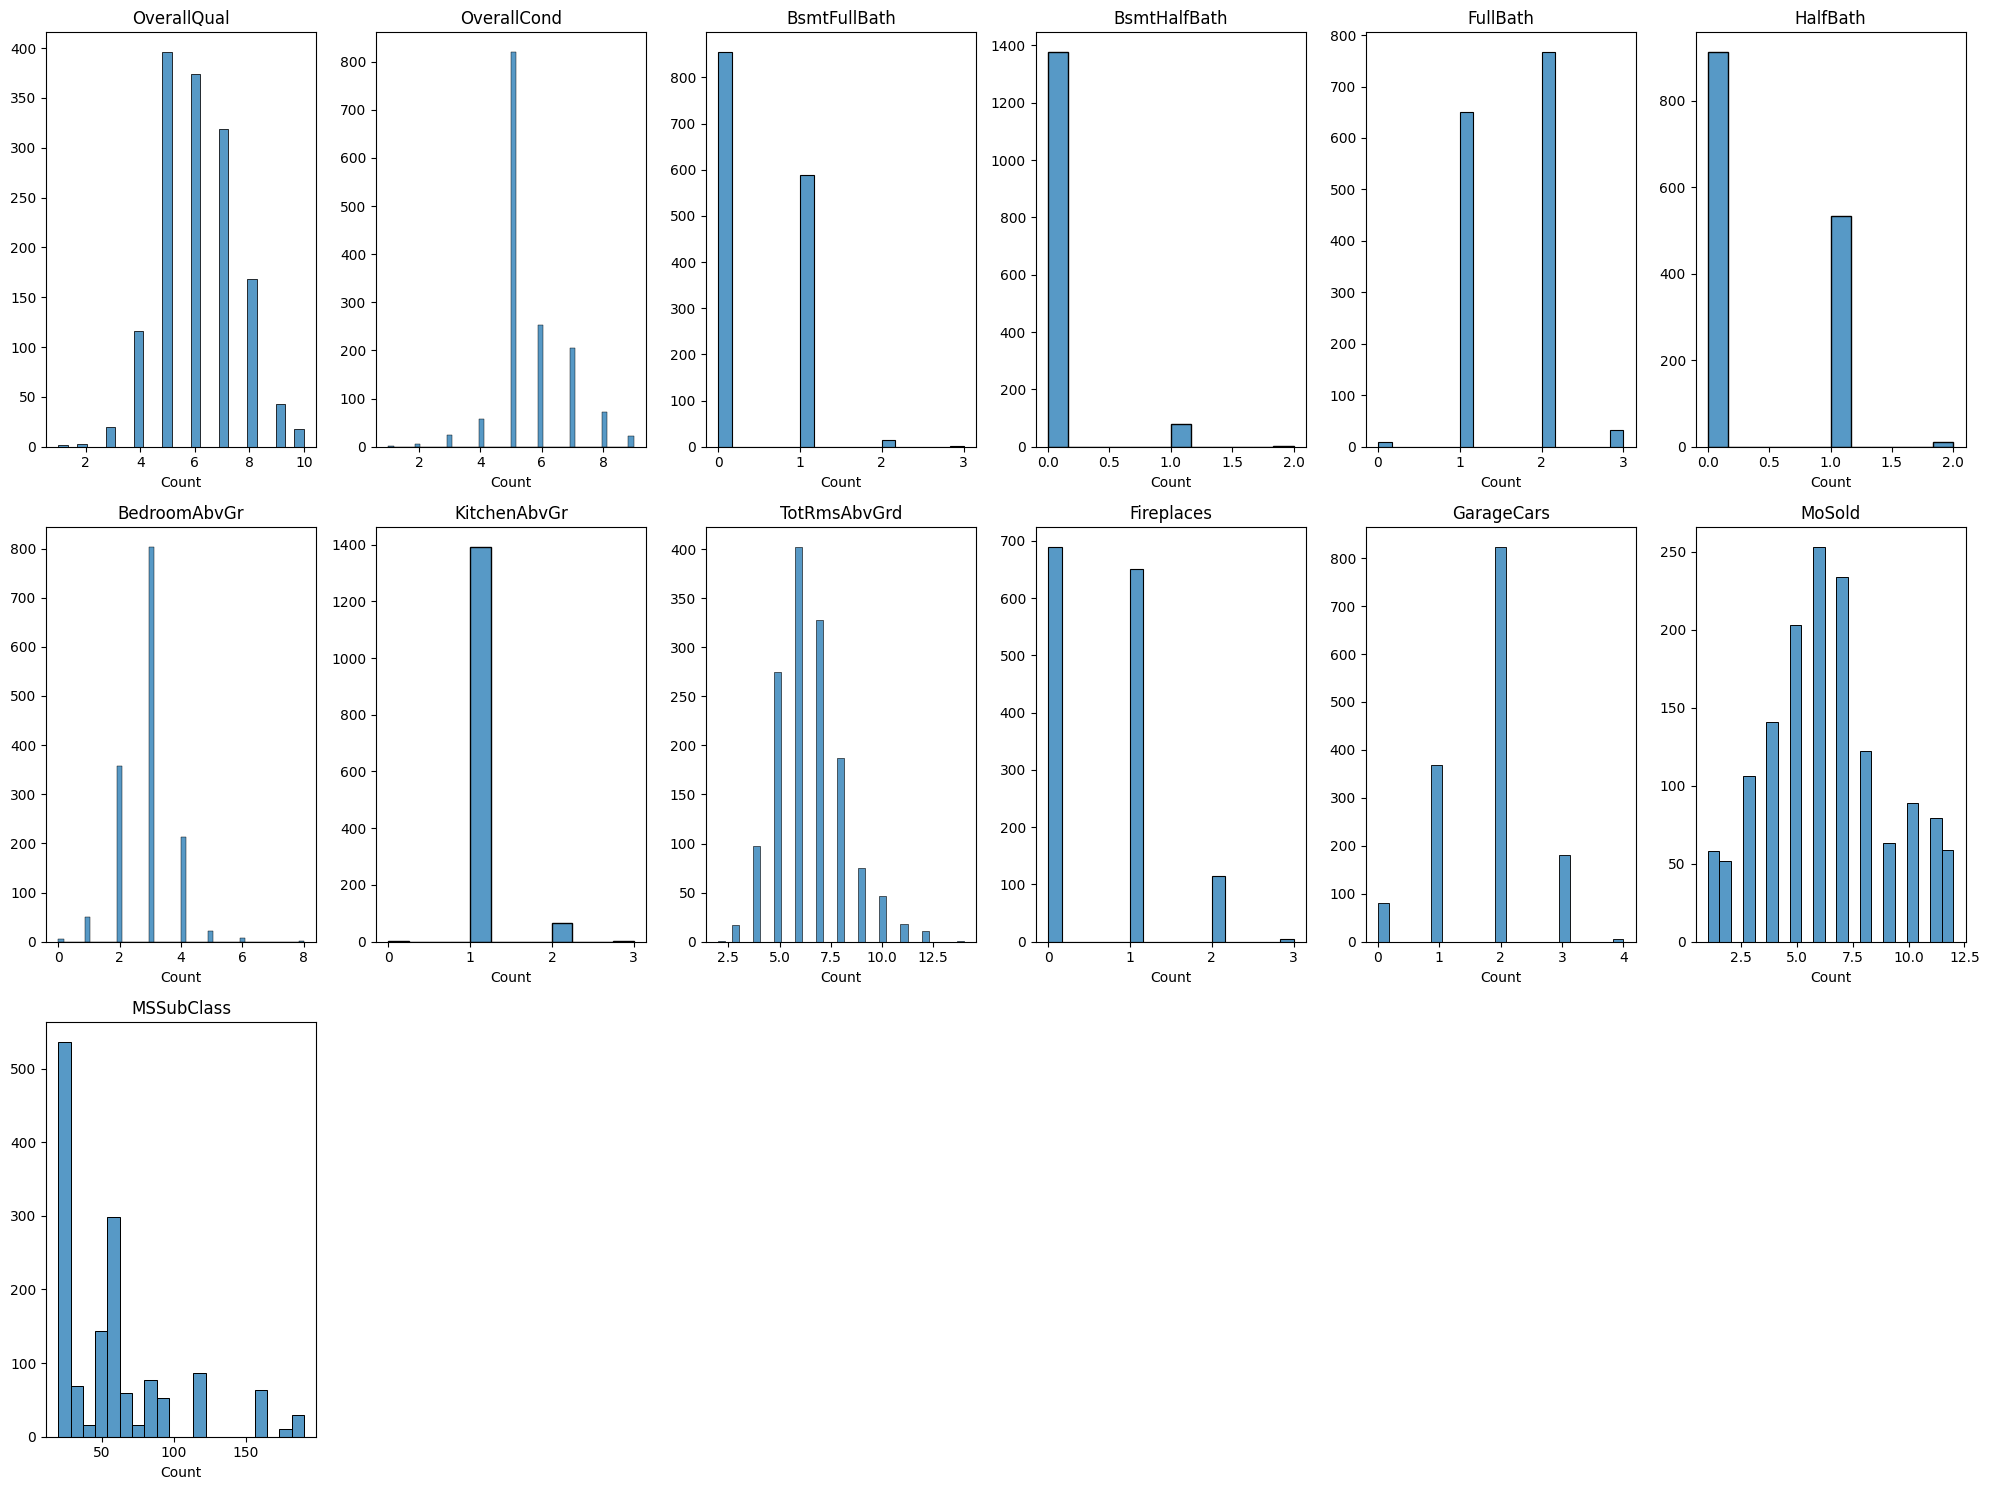

In [ ]:
visualize_hist(discrete_numerical_features)

##**Univariate Analysis Categorical Data**

Saya mencoba memahami satu persatu Fitur yang ada melalui Univariate Analysis ini dan akan mendalami nya lagi saat Multivariate Analysis untuk mencari Insight.

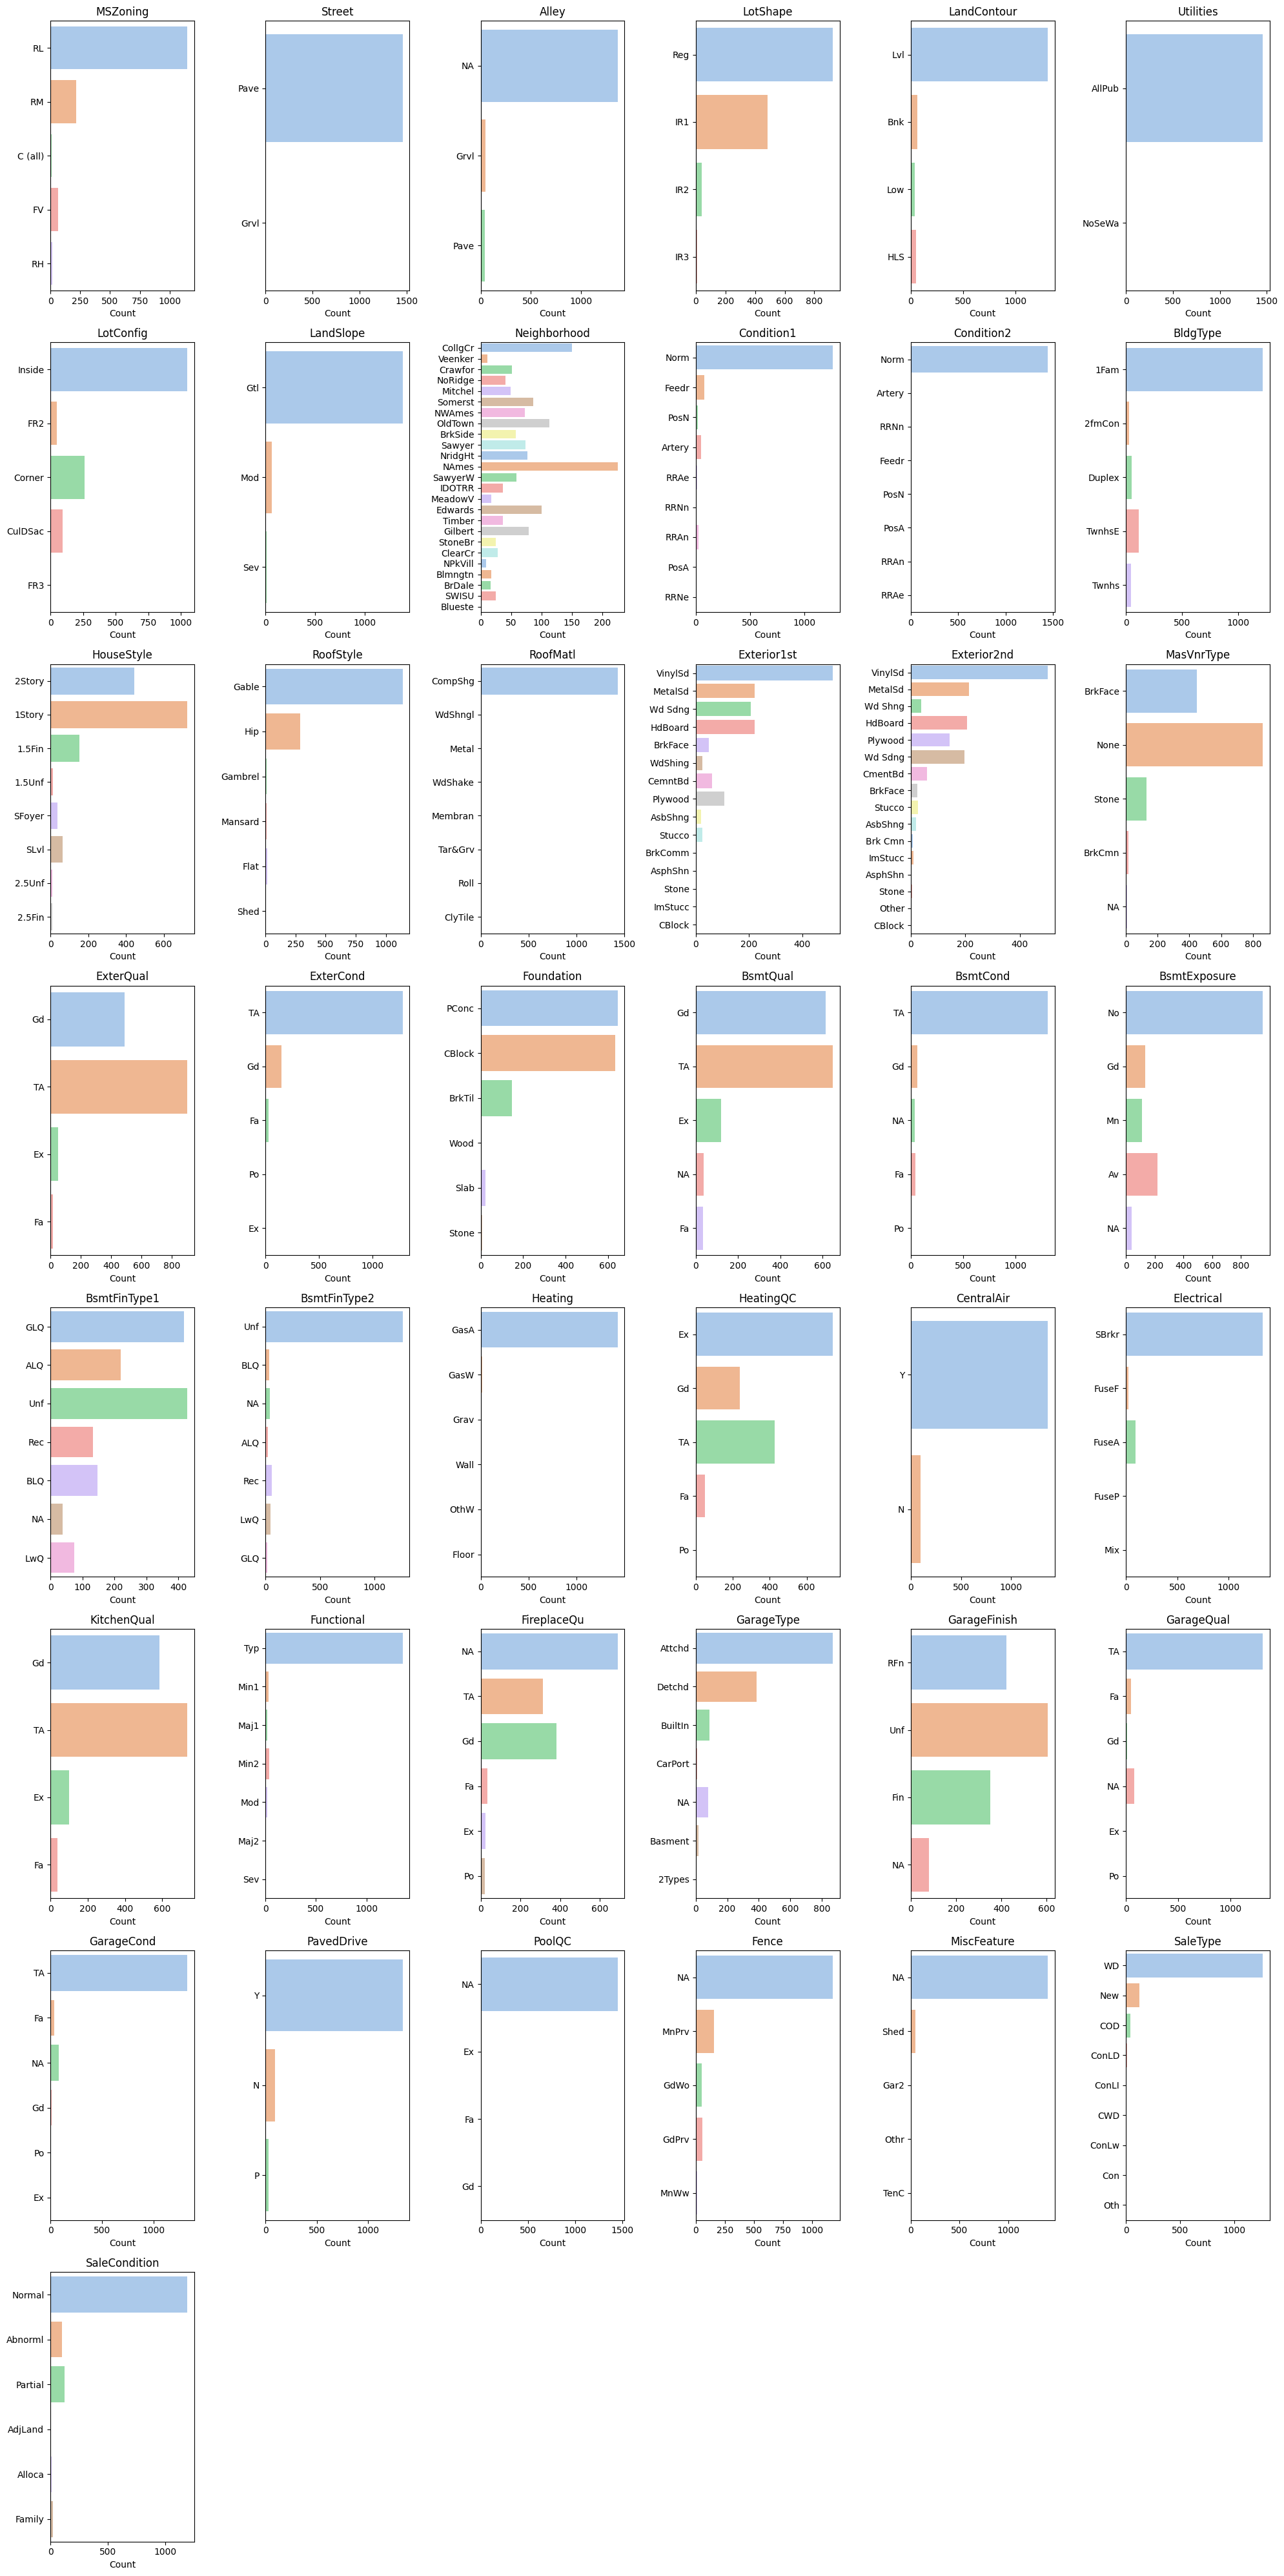

In [ ]:
categorical_columns = df_cat.columns

# Calculate number of rows and columns for subplots
n_cols = 6
n_rows = -(-len(categorical_columns) // n_cols)  # Ceiling division to ensure all items are covered

# Set up the figure and axes with proper size and spacing
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows), sharex=False, sharey=False)

# Loop through each categorical column and create countplots
for i, column in enumerate(categorical_columns):
    sns.countplot(y=column, data=df, ax=axes[i//n_cols, i%n_cols], palette='pastel')
    axes[i//n_cols, i%n_cols].set_title(column)
    axes[i//n_cols, i%n_cols].set_ylabel('')
    axes[i//n_cols, i%n_cols].set_xlabel('Count')
    axes[i//n_cols, i%n_cols].tick_params(axis='y', labelrotation=0)  # Rotate y-axis labels for better readability

# Remove any unused subplots
for j in range(len(categorical_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()

##**Multivariate Analysis**

Setelah Melakukan Univariate Analysis dan Memahami Informasi setiap Kolom saya melanjutkan ke Multivariate Analysis agar mendapatkan Pemahaman Lebih dalam Lagi Fitur-Fitur apa saja yang dapat mempengaruhi Harga Rumah.

Karena Banyaknya Fitur yang ada pada dataset kali ini Saya akan Mencari Korelasi antara Fitur dengan Target dan saya akan memilih Fitur dengan korelasi yang tinggi untuk di analisis lebih lanjut.

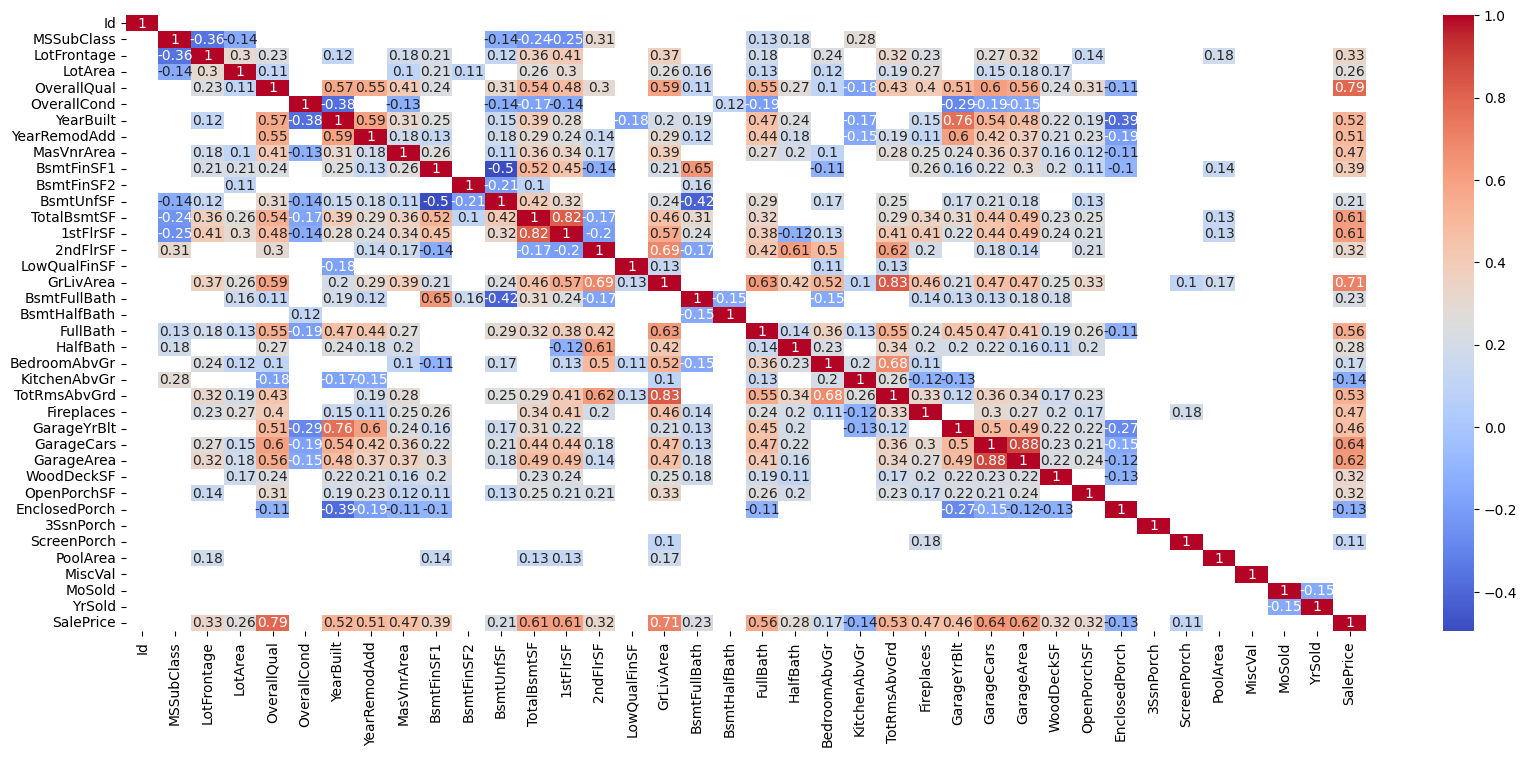

In [ ]:
corr_matrix = df.corr()
high_corr = corr_matrix.abs() >= 0.1

filtered_high = corr_matrix[high_corr]

plt.figure(figsize=(20, 8))
sns.heatmap(filtered_high, annot=True, cmap='coolwarm')
plt.show()

Saya mendapatkan bahwa fitur 'OverallQual' memiliki dampak yang signifikan terhadap harga dari rumah.

Saya juga mendapatkan bahwa Kualitas Rumah dipengaruhi oleh tahun dibuatnya rumah, Semakin Baru Rumah maka cenderung Rumah tersebut memiliki Kualitas yang lebih baik.


<Figure size 400x300 with 0 Axes>

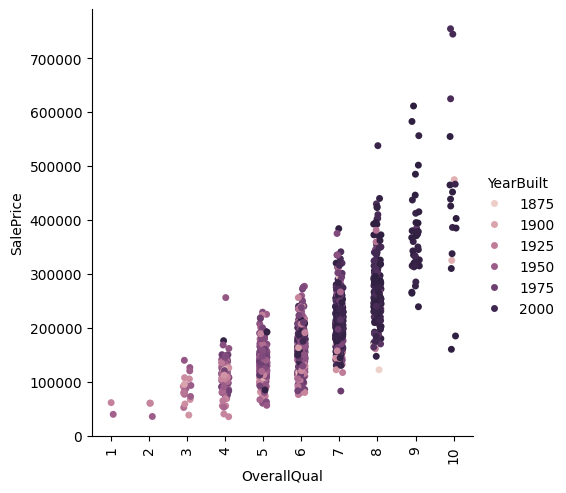

In [ ]:
plt.figure(figsize=(4,3))
sns.catplot(data=df, x="OverallQual", y="SalePrice", hue='YearBuilt')
plt.xticks(rotation=90)
plt.show()

Jumlah muatnya mobil pada Garasi juga berpengaruh terhadap Harga Rumah, namun saya mendapati pada dataset kali ini justru Nilai 4 muat mobil memiliki Harga Rumah dibawah 3 muat mobil.

Selanjutnya saya mencoba mencari tau mengapa hal tersebut bisa terjadi dan mendapati bahwa rumah yang memiliki 4 muat mobil memiliki kondisi yang buruk oleh karena itu Harga Rumah menjadi Turun.

Rumah dengan muat 3 mobil memiliki rata rata Kondisi Rumah yang baik maka Hal tersebut menjadikan Harga Rumah meningkat.


<Figure size 400x300 with 0 Axes>

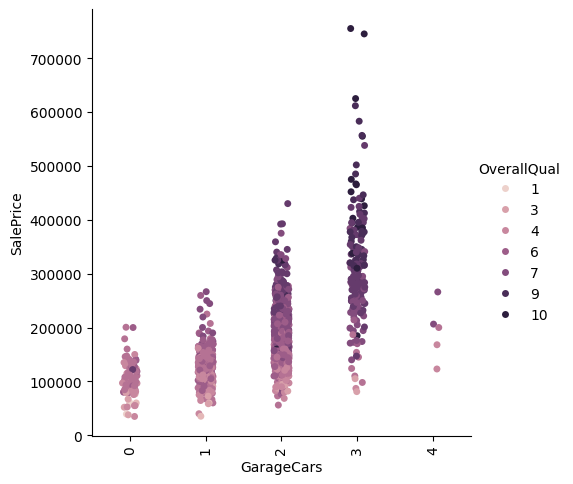

In [ ]:
plt.figure(figsize=(4,3))
sns.catplot(data=df, x="GarageCars", y="SalePrice", hue="OverallQual")
plt.xticks(rotation=90)
plt.show()

#Feature Engineering

**Setelah Melakukan Analisis secara Univariate dan Multivariate Saya akan melakukan Feature Engineering dengan Tujuan untuk melihat Korelasi Harga Rumah dengan Fitur-Fitur yang menurut saya penting.**

In [ ]:
df_fe = pd.DataFrame()

Saya membuat Fitur baru yang mengukur Total Luas dari Rumah yang ada.

Kegunaan : Ini akan membuat analisis untuk melihat Korelasi Luas rumah dengan Harga lebih Mudah dan Informatif

In [ ]:
df_fe['Total_area'] = df['GrLivArea'] + df['TotalBsmtSF'] + df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch']+ df['3SsnPorch'] + df['ScreenPorch']

Saya Membuat Jumlah Lantai Pada Rumah.

Kegunaan : Ini akan membuat analisis untuk melihat Jumlah Lantai pada rumah dengan Harga lebih Mudah dan Informatif

In [ ]:
df_fe["Number_of_floors"] = (df["TotalBsmtSF"] != 0).astype('int64') + (df["1stFlrSF"] != 0).astype('int64') + (df["2ndFlrSF"] != 0).astype('int64')

Karena tidak semua rumah memiliki Basement maka saya mencoba membuat fitur baru untuk melihat apakah rumah tersebut memiliki Basement atau Tidak.

Kegunaan : Saya Ingin Melihat apakah Rumah yang mempunyai Basement mempunyai Harga yang Lebih Banyak dibandingkan yang tidak.

In [ ]:
df_fe['HasBsmt'] = df['BsmtQual'].map(lambda x: 1 if x != 'NA' else 0)

Karena tidak semua rumah Api Unggun maka saya mencoba membuat fitur baru untuk melihat apakah rumah tersebut memiliki Api Unggun atau Tidak.

Kegunaan : Saya Ingin Melihat apakah Rumah yang mempunyai Api Unggun mempunyai Harga yang Lebih Banyak dibandingkan yang tidak.

In [ ]:
df_fe["Has_fireplace"] = df["FireplaceQu"].map(lambda x: 1 if x != 'NA' else 0)

Saya Membuat Jumlah Kamar Mandi Pada Rumah.

Kegunaan : Ini akan membuat analisis untuk melihat Jumlah Kamar Mandi pada rumah dengan Harga lebih Mudah dan Informatif.

In [ ]:
df_fe['Total_Full_Bath'] = df['FullBath'] + df['BsmtFullBath']

Saya Membuat Jumlah Toilet Pada Rumah.

Kegunaan : Ini akan membuat analisis untuk melihat Jumlah Toilet pada rumah dengan Harga lebih Mudah dan Informatif.

Half Bath artinya Kamar Mandi yang hanya memiliki Toilet tanpa memiliki Shower atau Bathub untuk mandi.

In [ ]:
df_fe['Total_Half_Bath'] = df['HalfBath'] + df['BsmtHalfBath']

Saya Membuat Fitur Baru untuk melihat apakah rumah sudah pernah direnovasi atau belum.

Kegunaan : Saya dapat melakukan analisis apakah rumah yang sudah di renovasi memiliki Harga yang lebih Baik dibandingkan yang tidak.

In [ ]:
df_fe["Is_Remodeled"] = (df["YearBuilt"] != df["YearRemodAdd"]).astype('int64')

Saya ingin melihat Berapa Lama Rumah dari dibuat sampai Terjual.

Kegunaan : Dapat dilakukan analisis Dengan fitur-fitur yang ada pada rumah seberapa cepat rumah tersebut akan Terjual.

In [ ]:
df_fe['House_Until_Sale'] = df['YrSold'] - df['YearBuilt']

Saya membuat fitur untuk melihat berapa lama rumah terjual setelah dilakukan Renovasi.

Kegunaan : Saya dapat apakah setelah rumah di renovasi akan terjual lebih cepat.

In [ ]:
df_fe['Remodeled_Until_Sale'] = df['YrSold'] - df['YearRemodAdd']
df_fe['Remodeled_Until_Sale'] = df_fe['Remodeled_Until_Sale'] * df_fe['Is_Remodeled']

Saya Membuat Fitur untuk melihat Umur rumah dari Proses Pembuatan Hingga Sekarang (Tahun 2024)

Kegunaan : dapat dilakukan Analisis lebih lanjut terkait umur Rumah dengan Harga Rumah.

In [ ]:
df_fe['House_Age'] = 2024 - df['YearBuilt']

Saya membuat Fitur baru untuk melihat Qualitas Rumah dengan lebih mudah dan lengkap.

Kegunaan : Lebih Mudah untuk melihat hubungan antara penilaian Kualitas dengan Harga Rumah.

In [ ]:
df_fe['Quality_Overall'] = df['OverallQual'] * df['OverallCond']

##Menganalisa Fitur baru yang telah dibuat

In [ ]:
df_fe.head()

Total_area  Number_of_floors  HasBsmt  Has_fireplace  Total_Full_Bath  \
0        2627                 3        1              0                3   
1        2822                 2        1              1                2   
2        2748                 3        1              1                3   
3        2780                 3        1              1                2   
4        3619                 3        1              1                3   

   Total_Half_Bath  Is_Remodeled  House_Until_Sale  Remodeled_Until_Sale  \
0                1             0                 5                     0   
1                1             0                31                     0   
2                1             1                 7                     6   
3                0             1                91                    36   
4                1             0                 8                     0   

   House_Age  Quality_Overall  
0         21               35  
1         48               48  
2         23               35  
3        109               35  
4         24               40

In [ ]:
print(df_fe.shape)
print(df.shape)

(1459, 11)
(1459, 81)


Menambah data Target untuk dilakukan Analisa Harga Rumah

In [ ]:
df_fe['SalePrice'] = df['SalePrice']

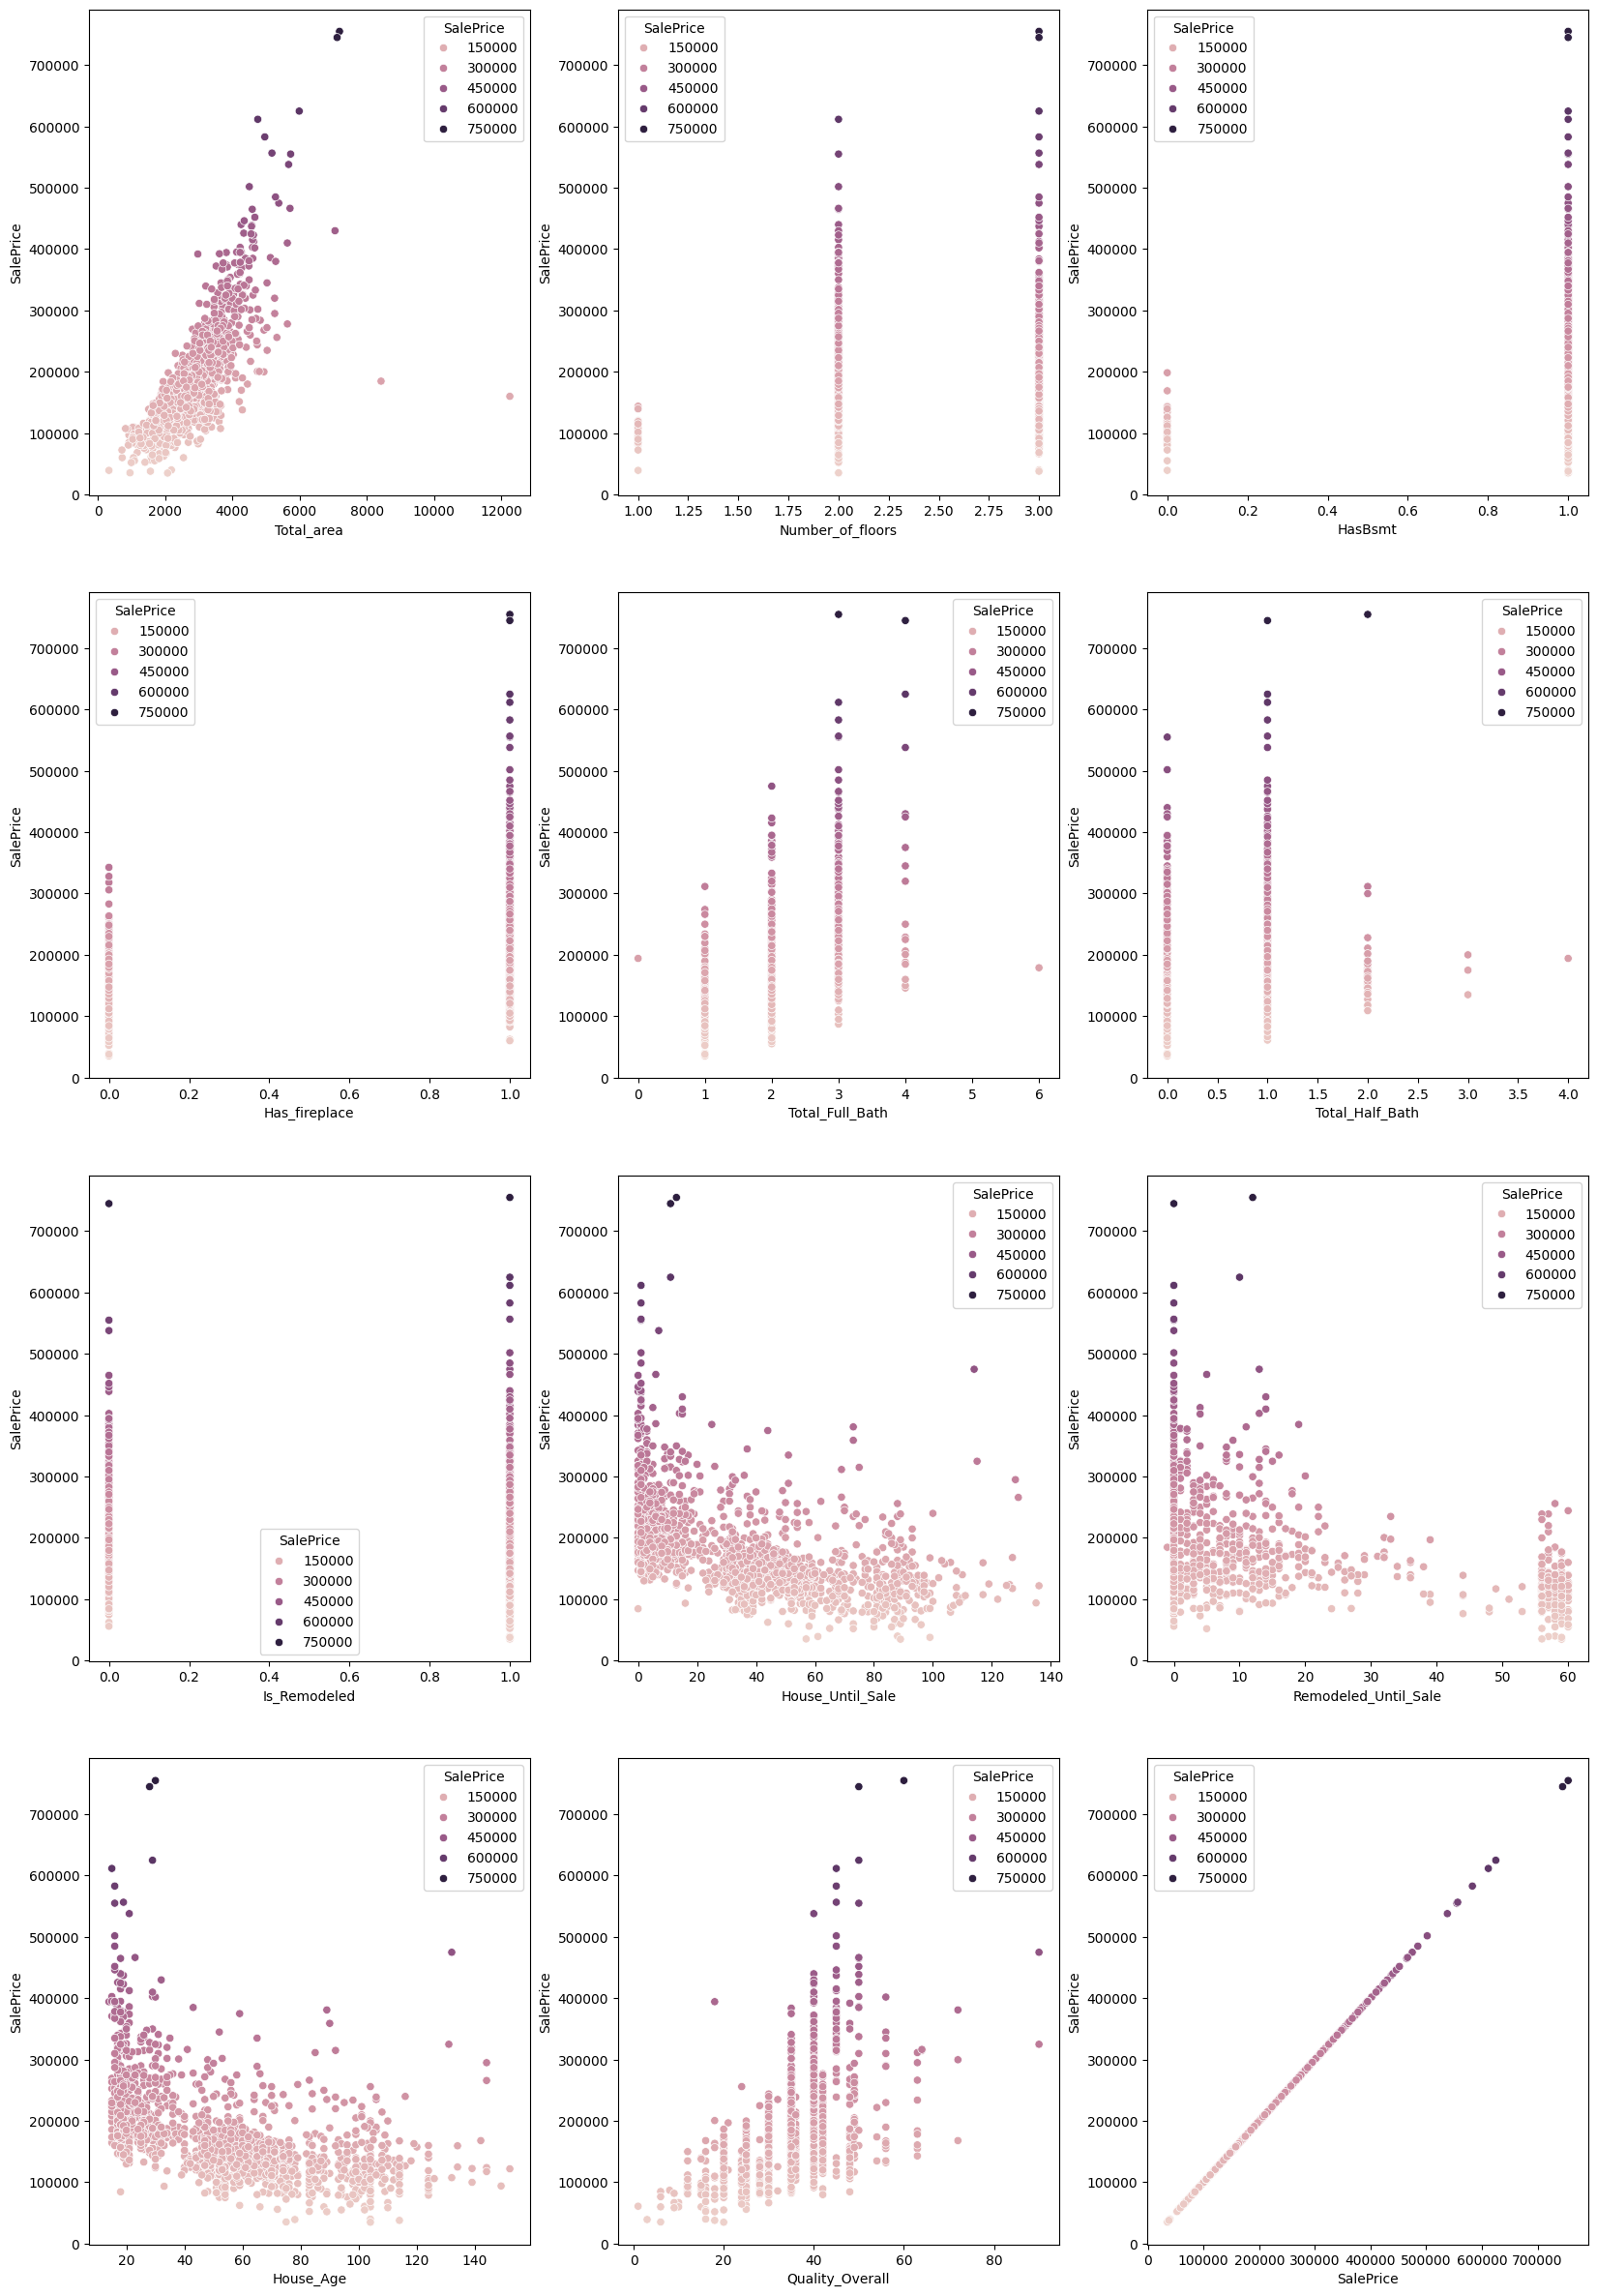

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(20, 30))
for var, subplot in zip(df_fe.columns, ax.flatten()):
    sns.scatterplot(x=var, y='SalePrice',  data=df_fe, ax=subplot, hue = 'SalePrice' )

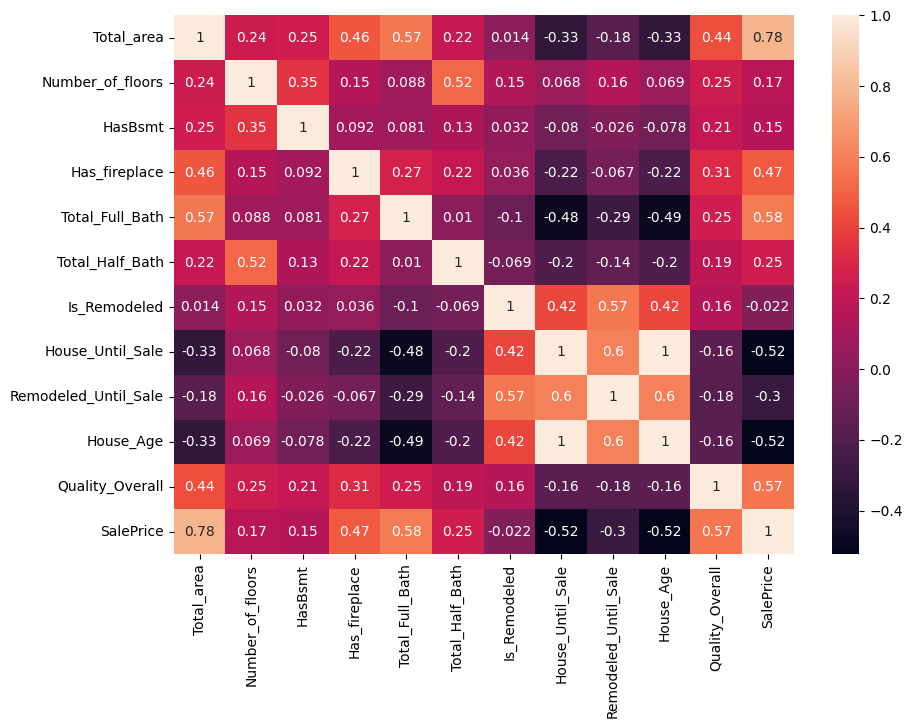

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df_fe.corr(), annot = True)
plt.show()

In [ ]:
X = df_fe.copy()
y = df['SalePrice']

In [ ]:
mi_scores = mutual_info_regression(X, y)

mi_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mi_scores})
mi_scores_df.sort_values(by='Mutual_Information', ascending=False, inplace=True)
print(mi_scores_df)

                 Feature  Mutual_Information
11             SalePrice            1.285385
0             Total_area            0.535616
10       Quality_Overall            0.270245
7       House_Until_Sale            0.268701
9              House_Age            0.268532
4        Total_Full_Bath            0.257804
3          Has_fireplace            0.168413
8   Remodeled_Until_Sale            0.087472
5        Total_Half_Bath            0.068771
1       Number_of_floors            0.038672
6           Is_Remodeled            0.017946
2                HasBsmt            0.016699


##Hasil Analisa Fitur Baru

- Total Luas Rumah Mempunyai Korelasi yang kuat terhadap Harga Rumah, semakin Besar Luas Rumah Harga Rumah cenderung memiliki Harga Rumah yang lebih besar.
- Semakin Banyak Jumlah Lantai maka Harga Rumah akan semakin Tinggi.
- Rumah yang memiliki Basement memiliki Perbedaan Harga rumah yang lebih tinggi dibandingkan Rumah yang tidak memiliki Basement.
- Rumah yang memiliki Api Unggun (Penghangat ruangan) memiliki Perbedaan Harga rumah yang lebih tinggi dibandingkan Rumah yang tidak memiliki Api Unggun.
- Jumlah Kamar Mandi juga mempengaruhi Harga Rumah.
- Jumlah Toilet juga mempengaruhi Harga Rumah tetapi tidak terlalu signifikan.
- Rumah yang telah direnovasi memiliki Harga yang lebih tinggi (dimulai dari 40000 keatas).
- Semakin Lama Rumah Tidak Terjual maka Harga nya akan semakin menurun.
- Penilaian Kualitas memiliki Korelasi yang sangat tinggi dengan Harga Rumah.
- Penilaian Kualitas juga Cenderung akan Mempengaruhi Fitur-Fitur yang lainnya saat memprediksi Harga Rumah.

Kesimpulan:
Harga Rumah akan semakin Meningkat saat Rumah memiliki Banyak Fitur tetapi Harga Rumah juga bisa menurun saat Umur Rumah Lama dan Kualitas Rumah Jelek (Penilaian Kualitas).

#Feature Encoding

In [ ]:
cat_cleaned_df = df.loc[:,cleaned_df.dtypes == 'object']

In [ ]:
cat_cleaned_df.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave    NA      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave    NA      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave    NA      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave    NA      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y     NA    NA          NA       WD        Normal  
1          Y     NA    NA          NA       WD        Normal  
2          Y     NA    NA          NA       WD        Normal  
3          Y     NA    NA          NA       WD       Abnorml  
4          Y     NA    NA          NA       WD        Normal  

[5 rows x 43 columns]

In [ ]:
column_to_drop_cat = ['Street', 'Utilities', 'Condition1', 'Condition2', 'RoofMatl',
                      'BsmtFinType2', 'Heating', 'Functional', 'PoolQC', 'MiscFeature',
                      'SaleType', 'SaleCondition']

cat_cleaned_df.drop(column_to_drop_cat, axis=1, inplace = True)

Label Encoding

In [ ]:
categorical_column = cat_cleaned_df.columns

label_encoder = LabelEncoder()

df_le = cat_cleaned_df.copy()

df_le[categorical_column] = label_encoder.fit_transform(categorical_column)

df_le.head()

MSZoning  Alley  LotShape  LandContour  LotConfig  LandSlope  Neighborhood  \
0        26      0        25           22         24         23            28   
1        26      0        25           22         24         23            28   
2        26      0        25           22         24         23            28   
3        26      0        25           22         24         23            28   
4        26      0        25           22         24         23            28   

   BldgType  HouseStyle  RoofStyle  ...  CentralAir  Electrical  KitchenQual  \
0         1          20         30  ...           6           7           21   
1         1          20         30  ...           6           7           21   
2         1          20         30  ...           6           7           21   
3         1          20         30  ...           6           7           21   
4         1          20         30  ...           6           7           21   

   FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  \
0           13          18            16          17          15          29   
1           13          18            16          17          15          29   
2           13          18            16          17          15          29   
3           13          18            16          17          15          29   
4           13          18            16          17          15          29   

   Fence  
0     12  
1     12  
2     12  
3     12  
4     12  

[5 rows x 31 columns]

One Hot Encoding

One Hot Encoding lebih cocok untuk permasalahan regresi.

In [ ]:
df_ohe = cat_cleaned_df.copy()

df_ohe = pd.get_dummies(df_ohe, columns = categorical_column)

df_ohe.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Alley_Grvl  Alley_NA  Alley_Pave  LotShape_IR1  LotShape_IR2  ...  \
0           0         1           0             0             0  ...   
1           0         1           0             0             0  ...   
2           0         1           0             1             0  ...   
3           0         1           0             1             0  ...   
4           0         1           0             1             0  ...   

   GarageCond_Po  GarageCond_TA  PavedDrive_N  PavedDrive_P  PavedDrive_Y  \
0              0              1             0             0             1   
1              0              1             0             0             1   
2              0              1             0             0             1   
3              0              1             0             0             1   
4              0              1             0             0             1   

   Fence_GdPrv  Fence_GdWo  Fence_MnPrv  Fence_MnWw  Fence_NA  
0            0           0            0           0         1  
1            0           0            0           0         1  
2            0           0            0           0         1  
3            0           0            0           0         1  
4            0           0            0           0         1  

[5 rows x 194 columns]

NOTE : DAPAT DILAKUKAN FITUR SELECTION lebih lanjut atau DATA REDUCTION SEBELUM MASUK KE TAHAP MACHINE LEARNING

#MACHINE LEARNING

In [ ]:
###